# Class-Bias and survivability on the Titanic 

##  Problem Statement 

The story of the Titanic was famous before it was made into a movie starring Kate and Leo. It is usually thought of as a story of hubris on the part of the engineers and of the captain. While the story of the collision is well documented, we can learn more about who was able to survive by examining the Titanic dataset and looking for patterns of the survivors. <br/>

Was there a cultural bias that determined access to lifeboats? Did certain classes, in particular the wealthy, have more members who survived the incident? 

Given the passenger class, age, sex and point of origin, was there a higher probability to survive?

### Hypothesis

In order to establish the possiblity that class played a role in the who survived the Titanic disaster, we must first establish if there are associated attributes of class at play such as where the various class are located relative to lifeboats. Put another way, did everyone have equal access to lifeboats? 

It is important to establish some facts about the incdent. _From http://www.titanicfacts.net/_ <br/>
1. On April 14th 1912 at 11:40PM the Titanic struck a submerged iceberg in the north atlantic
2. The ship took 2 hours and 40 minutes to be completely submerged
3. There were 20 lifeboats on board, though the ship was equiped to carry as many as 64
4. 31.6% of the passengers and crew survived
5. 53.4% could have survived if lifeboats had been filled to capacity

#### Layout of the cabin classes

![](titanicboatdeckMap.png "The Boat Deck of the Titanic")

#### Analyzing the data on Suvivors 

The data has been obtained from Kaggle.
It is already split into two parts, a training set and a test set. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading in the training dataset
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
full_data = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#looking for any missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Here we see that there are 891 entries. Several features are missing data, presumably because it was not possible to collect post-disaster or reconstruct from ship manifests. The features with missing data are: Age (177 missing) and cabin (687 missing). There were also 2 missing from Embarked, though there may be a way to fill in those specific values.

In [5]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Ms. Amelie Icard, a maid to Mrs. Stone, stayed in her cabin (B28) and boarded on her ticket. They embarked at Southampton, according to _https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html_

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
import numpy as np
for dataset in full_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.1+ KB


C:\Users\mvnai_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Here is a comparison of the number of survivors based on embarkation point 

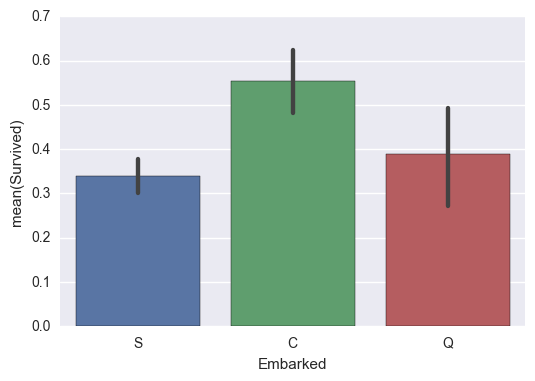

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


In [10]:
train.Embarked.value_counts()
sns.barplot(x=train.Embarked,y=train.Survived)
sns.plt.show()

print (train[['Embarked','Survived']].groupby(['Embarked']).mean())

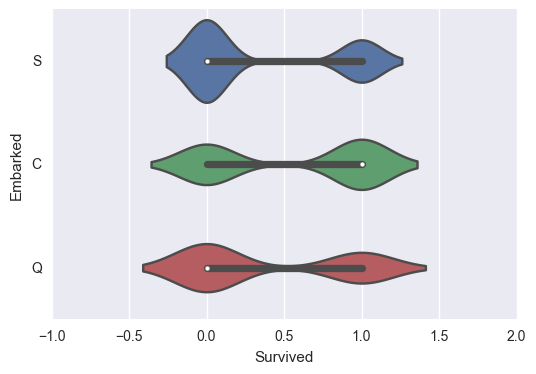

In [11]:
sns.violinplot(x='Survived', y='Embarked',data=train)

In [12]:
pivot = pd.pivot_table(train,index=['Embarked'])
pivot

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Embarked,,,,,,,
C,30.672619,59.954144,0.363095,445.357143,1.886905,0.386905,0.553571
Q,28.298701,13.276030,0.168831,417.896104,2.909091,0.428571,0.389610
S,29.608359,27.243651,0.411765,449.517028,2.346749,0.569659,0.339009


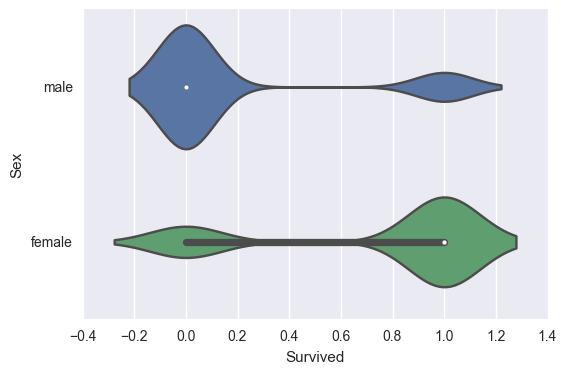

In [13]:
sns.violinplot(x='Survived', y='Sex',data=train)

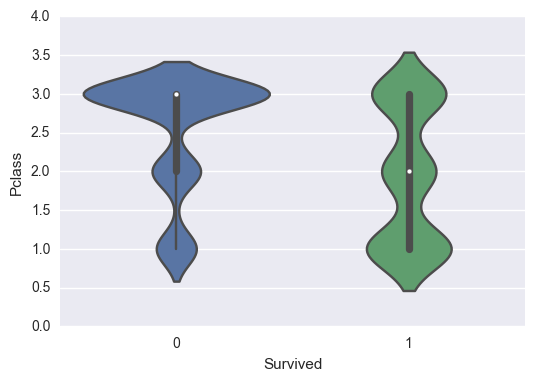

In [14]:
#Looking at survivorship by cabin class, lower is higher
sns.violinplot(x='Survived', y='Pclass',data=train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BE97BE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C55AE10>]], dtype=object)

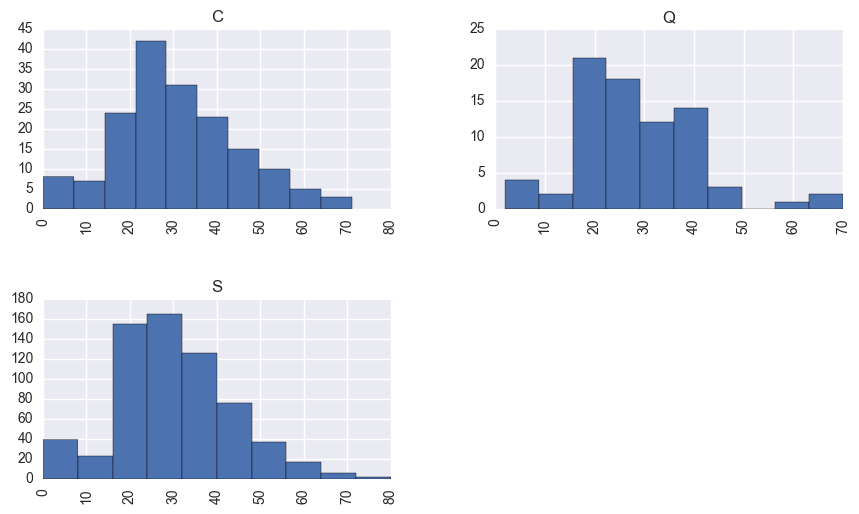

In [15]:
#Histograms of ages for all three cities
data=train.Age
data.hist(by=train.Embarked, figsize=(10,6))

In [16]:
sex = pd.get_dummies(train.Sex,prefix='sex',drop_first=True)
train1 = train.join(sex)
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


In [17]:
city = pd.get_dummies(train.Embarked,prefix='city',drop_first=False)
train1 = train1.join(city)
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male,city_C,city_Q,city_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,0,0,1


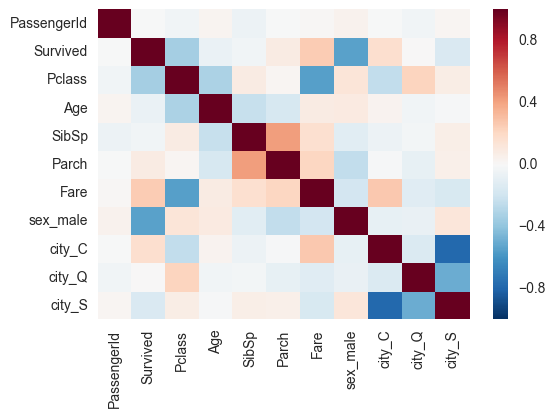

In [18]:
traincor = train1.corr()
sns.heatmap(traincor)
sns.plt.show()

Survivorship had a negative correlation with being male and with Passenger Class. This makes sense given that we know Women and Children were given priority on lifeboats and more 1st class passengers survived.  

### Feature engineering

Binning age and fare,  and create features from titles

In [19]:
import re as re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [20]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male,city_C,city_Q,city_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,0,0,1


In [21]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [22]:
print train.loc[train.Title=='Master','Age'].mean()
print train.loc[train.Title=='Miss','Age'].mean()
print train.loc[train.Title=='Mr','Age'].mean()
print train.loc[train.Title=='Mrs','Age'].mean()
print train.loc[train.Title=='Rare','Age'].mean()

6.825
23.2
31.833655706
34.9126984127
45.0869565217


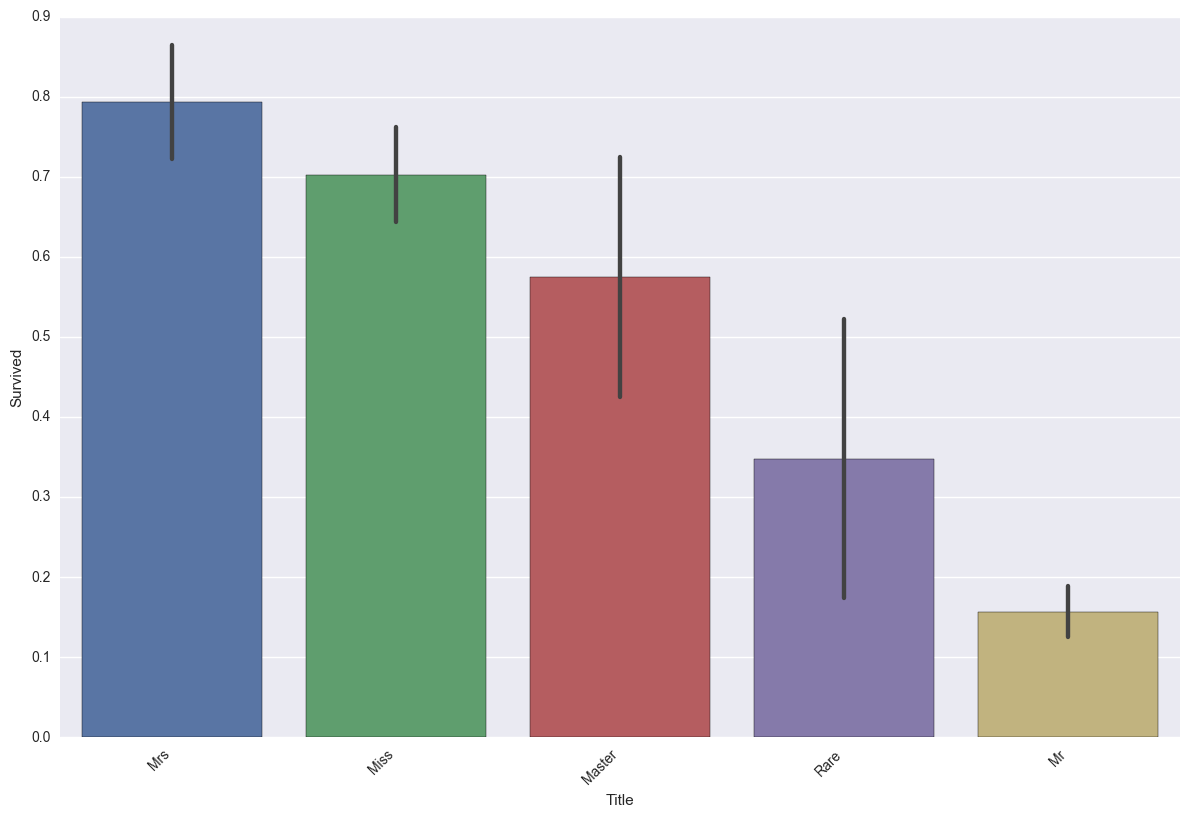

In [23]:
title_cat = train.groupby(['Title'])[['Survived']].mean().sort_values('Survived', ascending=False)
plot = sns.factorplot(x='Title', 
                      y='Survived',
                      kind='bar',
                      data = train,
                      order=title_cat.index.tolist(), # to sort the bars
                      size=8, # layout (height)
                      aspect=1.5 # layout (width relative to height)
            )
plot.set_xticklabels(rotation=45, horizontalalignment='right'); # layout: x tick formatting

In [39]:
sex = pd.get_dummies(train.Sex,prefix='sex',drop_first=True)
train3 = train.join(sex)
city = pd.get_dummies(train.Embarked,prefix='city',drop_first=False)
train3 = train3.join(city)
title = pd.get_dummies (train.Title,prefix='title')
train3 = train3.join(title)
train3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,CategoricalAge,sex_male,city_C,city_Q,city_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,"(16, 32]",1,0,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,"(32, 48]",0,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,"(16, 32]",0,0,0,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,...,"(32, 48]",0,0,0,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,...,"(32, 48]",1,0,0,1,0,0,1,0,0


In [40]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

  CategoricalFare  Survived
0       [0, 7.91]  0.197309
1  (7.91, 14.454]  0.303571
2    (14.454, 31]  0.454955
3   (31, 512.329]  0.581081


In [41]:
import numpy as np
for dataset in full_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0    (-0.08, 16]  0.533333
1       (16, 32]  0.352550
2       (32, 48]  0.376471
3       (48, 64]  0.434783
4       (64, 80]  0.090909


C:\Users\mvnai_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null int32
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              204 non-null object
Embarked           891 non-null object
Title              891 non-null object
CategoricalFare    891 non-null category
CategoricalAge     891 non-null category
sex_male           891 non-null uint8
city_C             891 non-null uint8
city_Q             891 non-null uint8
city_S             891 non-null uint8
title_Master       891 non-null uint8
title_Miss         891 non-null uint8
title_Mr           891 non-null uint8
title_Mrs          891 non-null uint8
title_R

In [43]:
train4 = train3.drop(['PassengerId','Name','Sex','Ticket', 'Cabin', 'Embarked', 'Title','CategoricalFare','CategoricalAge'], axis=1)

In [44]:
train4.info()
train4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Age             891 non-null int32
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
sex_male        891 non-null uint8
city_C          891 non-null uint8
city_Q          891 non-null uint8
city_S          891 non-null uint8
title_Master    891 non-null uint8
title_Miss      891 non-null uint8
title_Mr        891 non-null uint8
title_Mrs       891 non-null uint8
title_Rare      891 non-null uint8
dtypes: float64(1), int32(1), int64(4), uint8(9)
memory usage: 46.2 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,sex_male,city_C,city_Q,city_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare
0,0,3,22,1,0,7.2500,1,0,0,1,0,0,1,0,0
1,1,1,38,1,0,71.2833,0,1,0,0,0,0,0,1,0
2,1,3,26,0,0,7.9250,0,0,0,1,0,1,0,0,0
3,1,1,35,1,0,53.1000,0,0,0,1,0,0,0,1,0
4,0,3,35,0,0,8.0500,1,0,0,1,0,0,1,0,0


In [45]:
# Mapping Fare

train4.loc[ train4['Fare'] <= 7.91, 'Fare'] 						        = 0
train4.loc[(train4['Fare'] > 7.91) & (train4['Fare'] <= 14.454), 'Fare'] = 1
train4.loc[(train4['Fare'] > 14.454) & (train4['Fare'] <= 31), 'Fare']   = 2
train4.loc[ train4['Fare'] > 31, 'Fare'] 							        = 3
train4['Fare'] = train4['Fare'].astype(int)

In [46]:
# Mapping Age
train4.loc[ train4['Age'] <= 16, 'Age'] 					       = 0
train4.loc[(train4['Age'] > 16) & (train4['Age'] <= 32), 'Age'] = 1
train4.loc[(train4['Age'] > 32) & (train4['Age'] <= 48), 'Age'] = 2
train4.loc[(train4['Age'] > 48) & (train4['Age'] <= 64), 'Age'] = 3
train4.loc[ train4['Age'] > 64, 'Age']

33     66
54     65
96     71
116    70
280    65
456    65
493    71
630    80
672    70
745    70
851    74
Name: Age, dtype: int32

In [47]:
train4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_male,city_C,city_Q,city_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare
0,0,3,1,1,0,0,1,0,0,1,0,0,1,0,0
1,1,1,2,1,0,3,0,1,0,0,0,0,0,1,0
2,1,3,1,0,0,1,0,0,0,1,0,1,0,0,0
3,1,1,2,1,0,3,0,0,0,1,0,0,0,1,0
4,0,3,2,0,0,1,1,0,0,1,0,0,1,0,0
